In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
#컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#레이블 개수 확인 (숫자)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#outcome만 제거하고 x를 만든다
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [8]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [9]:
#레이블만 남겨둔다.
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.(SVM, LR, RF, DT, KNN)

In [10]:
from sklearn.model_selection import train_test_split
#트레인, 테스트 각각 나눠주기
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

svm

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
#fit 한 다음 모델 이름을 예측값을 만든다.
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit( X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


LR

In [13]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [14]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


DT

In [15]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7447916666666666
[[103  27]
 [ 22  40]]


RF

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]


# 2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

In [17]:
Y = pd.get_dummies(y).values

In [18]:
X = X.values

In [19]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [21]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import tensorflow as tf

model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236 (944.00 B)

 Trainable params: 236 (944.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3478 - loss: 13.2441 - val_accuracy: 0.3052 - val_loss: 9.3015
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3601 - loss: 8.5002 - val_accuracy: 0.3052 - val_loss: 6.1971
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3424 - loss: 5.9116 - val_accuracy: 0.3052 - val_loss: 4.3471
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3423 - loss: 4.1367 - val_accuracy: 0.3052 - val_loss: 3.2113
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3597 - loss: 3.1275 - val_accuracy: 0.3052 - val_loss: 2.3968
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3722 - loss: 2.1446 - val_accuracy: 0.3052 - val_loss: 1.8483
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3824 - loss: 1.7160 - val_accuracy: 0.3312 - val_loss: 1.4288
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3829 - loss: 1.3196 - val_accuracy: 0.4091 - val_l

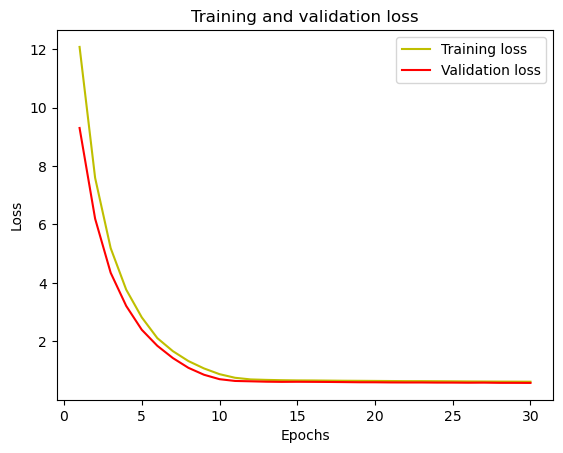

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


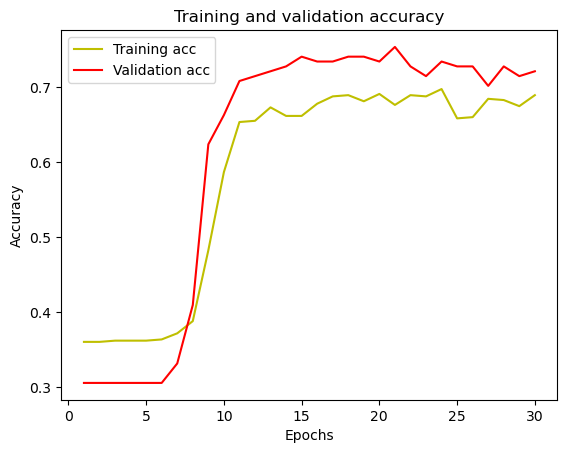

In [24]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라

In [25]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
new_df=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]

In [27]:
new_df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [28]:
X=new_df.drop('BMI',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델 생성
regressor_lr = LinearRegression()

# 모델 학습
regressor_lr.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred_lr = regressor_lr.predict(X_test)

# 선형 회귀 모델의 MSE 계산
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 0.1644301013138887


# 4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [33]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('BMI', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.468492,1.425995,1.365896
1,-1.123396,-0.160546,0.530902,-0.692891,-0.365061,-0.190672,-0.732120
2,1.943724,-0.263941,-1.288212,-0.692891,0.604397,-0.105584,1.365896
3,-0.998208,-0.160546,0.154533,0.123302,-0.920763,-1.041549,-0.732120
4,0.504055,-1.504687,0.907270,0.765836,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,-0.908682,2.532136,-0.732120
764,0.034598,0.046245,0.405445,-0.692891,-0.398282,-0.531023,-0.732120
765,0.003301,0.149641,0.154533,0.279594,-0.685193,-0.275760,-0.732120
766,0.159787,-0.470732,-1.288212,-0.692891,-0.371101,1.170732,1.365896


In [34]:
x=scaled_df_standard

X = x.values

X

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.94372388, -0.26394125, -1.28821221, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [35]:
y = df['BMI']

Y = pd.get_dummies(y).values
Y 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 7) (192, 7) (576, 248) (192, 248)


In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [38]:
#Defining the model 

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam


input_layer = Input(shape=(7,))

hidden1 = Dense(7, activation='tanh')(input_layer)
hidden2 = Dense(64, activation='tanh')(hidden1)
hidden3 = Dense(32, activation='tanh')(hidden2)

output_layer = Dense(1)(hidden3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,681 (10.47 KB)

 Trainable params: 2,681 (10.47 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.004

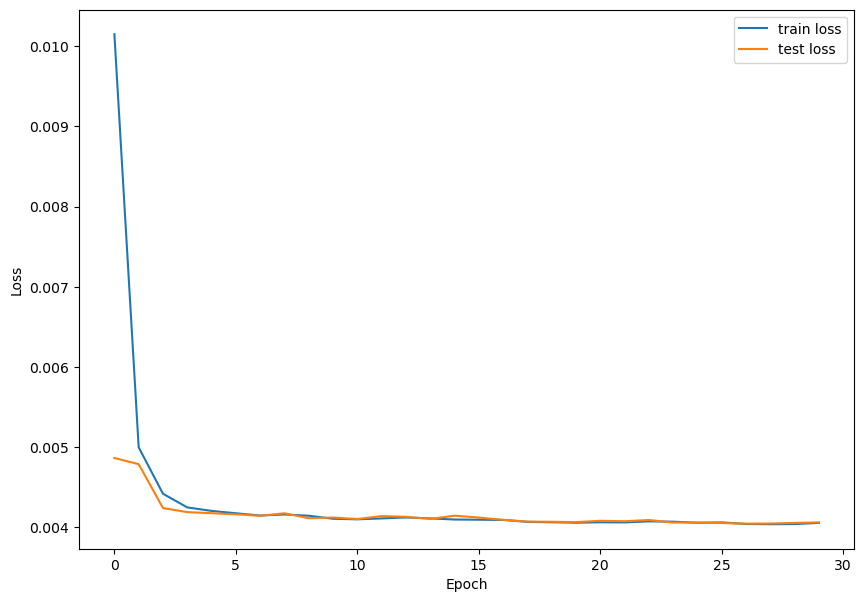

In [40]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mse: 0.0041 


[0.004062487743794918, 0.004062487743794918]